In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.decomposition import PCA,KernelPCA,TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap.umap_ as umap
from sklearn.metrics import silhouette_score
import joblib

# Dataset

In [3]:
df=pd.read_csv('df_cleaned.csv')
df

,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,Female,United States,No_data,No,1,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1,44,Male,United States,No_data,No,0,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2,32,Male,Canada,No_data,No,0,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,3,31,Male,United Kingdom,No_data,Yes,1,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,4,31,Male,United States,No_data,No,0,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1254,26,Male,United Kingdom,No,No,1,No_data,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1200,1255,32,Male,United States,No,Yes,1,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1201,1256,34,Male,United States,No,Yes,1,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1202,1257,46,Female,United States,No,No,0,No_data,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Data Insights

In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0                   0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1204 non-null   int64 
 1   Age                        1204 non-null   int64 
 2   Gender                     1204 non-null   object
 3   Country                    1204 non-null   object
 4   self_employed              1204 non-null   object
 5   family_history             1204 non-null   object
 6   treatment                  1204 non-null   int64 
 7   work_interfere             1204 non-null   object
 8   no_employees               1204 non-null   object
 9   remote_work                1204 non-null   object
 10  tech_company               1204 non-null   object
 11  benefits                   1204 non-null   object
 12  care_options               1204 non-null   object
 13  wellness_program           1204 non-null   object
 14  seek_hel

# Feature Engineering

In [7]:
df.drop(['Unnamed: 0','Gender','Country','phys_health_consequence','phys_health_interview','no_employees'],axis=1,inplace=True)
df['work_interfere']=df['work_interfere'].map({'Never': 0,'Rarely': 1,'Sometimes': 3,'Often': 4,'No_data': 2})
df['leave']=df['leave'].map({'Very difficult': 0,'Somewhat difficult': 1,"Don't know": 2,'Somewhat easy': 3,'Very easy': 4})
df['mental_health_consequence']=df['mental_health_consequence'].map({'No': 0,"Maybe": 0.5,'Yes': 1})
df['mental_vs_physical']=df['mental_vs_physical'].map({'Yes':1,'No':0,"Don't know":0.5})
df['risk_score']= df['family_history'].map({'Yes':1,'No':0})+df['mental_health_consequence']+df['mental_vs_physical']
df['Support']=df['benefits'].map({'Yes':1,'No':0,"Don't know":0.5})+df['care_options'].map({'Yes':1,'No':0,"Not sure":0.5})+df['wellness_program'].map({'Yes':1,'No':0,"Don't know":0.5})+df['leave']

In [8]:
columns=['family_history','benefits','care_options','wellness_program','seek_help','anonymity','coworkers','supervisor','mental_health_interview']
dict={'Yes':1,'No':0,"Don't know":0.5,'Some of them':0.5,'Maybe':0.5,'Not sure':0.5}
for i in columns:
    df[i]=df[i].map(dict)
df

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support
0,37,No_data,0.0,1,4,No,Yes,1.0,0.5,0.0,...,1.0,3,0.0,0.5,1.0,0.0,1.0,No,1.0,4.5
1,44,No_data,0.0,0,1,No,No,0.5,0.0,0.5,...,0.5,2,0.5,0.0,0.0,0.0,0.5,No,1.0,3.0
2,32,No_data,0.0,0,1,No,Yes,0.0,0.0,0.0,...,0.5,1,0.0,1.0,1.0,1.0,0.0,No,0.0,1.0
3,31,No_data,1.0,1,4,No,Yes,0.0,1.0,0.0,...,0.0,1,1.0,0.5,0.0,0.5,0.0,Yes,2.0,2.0
4,31,No_data,0.0,0,0,Yes,Yes,1.0,0.0,0.5,...,0.5,2,0.0,0.5,1.0,1.0,0.5,No,0.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,26,No,0.0,1,2,No,Yes,0.0,0.0,0.0,...,0.5,3,0.0,0.5,0.5,0.0,0.5,No,0.5,3.0
1200,32,No,1.0,1,4,Yes,Yes,1.0,1.0,0.0,...,1.0,1,0.0,0.5,1.0,0.0,1.0,No,2.0,3.0
1201,34,No,1.0,1,3,No,Yes,1.0,1.0,0.0,...,0.5,1,1.0,0.0,0.0,0.0,0.0,No,2.0,3.0
1202,46,No,0.0,0,2,Yes,Yes,0.0,1.0,0.0,...,0.5,2,1.0,0.0,0.0,0.0,0.0,No,1.0,3.0


# Preprocessing

In [9]:
preprocessor=ColumnTransformer([
    ('robust',RobustScaler(),['Age']),
    ('encode',OneHotEncoder(),df.select_dtypes(include='object').columns),
],
remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(), ['Age']),
                                ('encode', OneHotEncoder(),
                                 Index(['self_employed', 'remote_work', 'tech_company', 'obs_consequence'], dtype='object'))])

# Dimensionality Reduction

In [10]:
pipeline1=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('PCA',PCA(n_components=2,random_state=42)),
])
pipeline2=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('TSNE',TSNE(n_components=2,random_state=42)),
    # ('scale',StandardScaler())
])
pipeline3=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('KernelPCA',KernelPCA(n_components=2,random_state=42)),
])
pipeline4=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('UMAP',umap.UMAP(n_components=2,random_state=42)),
    
])
pipeline={'PCA':pipeline1,'TSNE':pipeline2,'KernelPCA':pipeline3,'UMAP':pipeline4}


C:\Users\AMRINDER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 0.98, 'Dimensionality-Reduction')

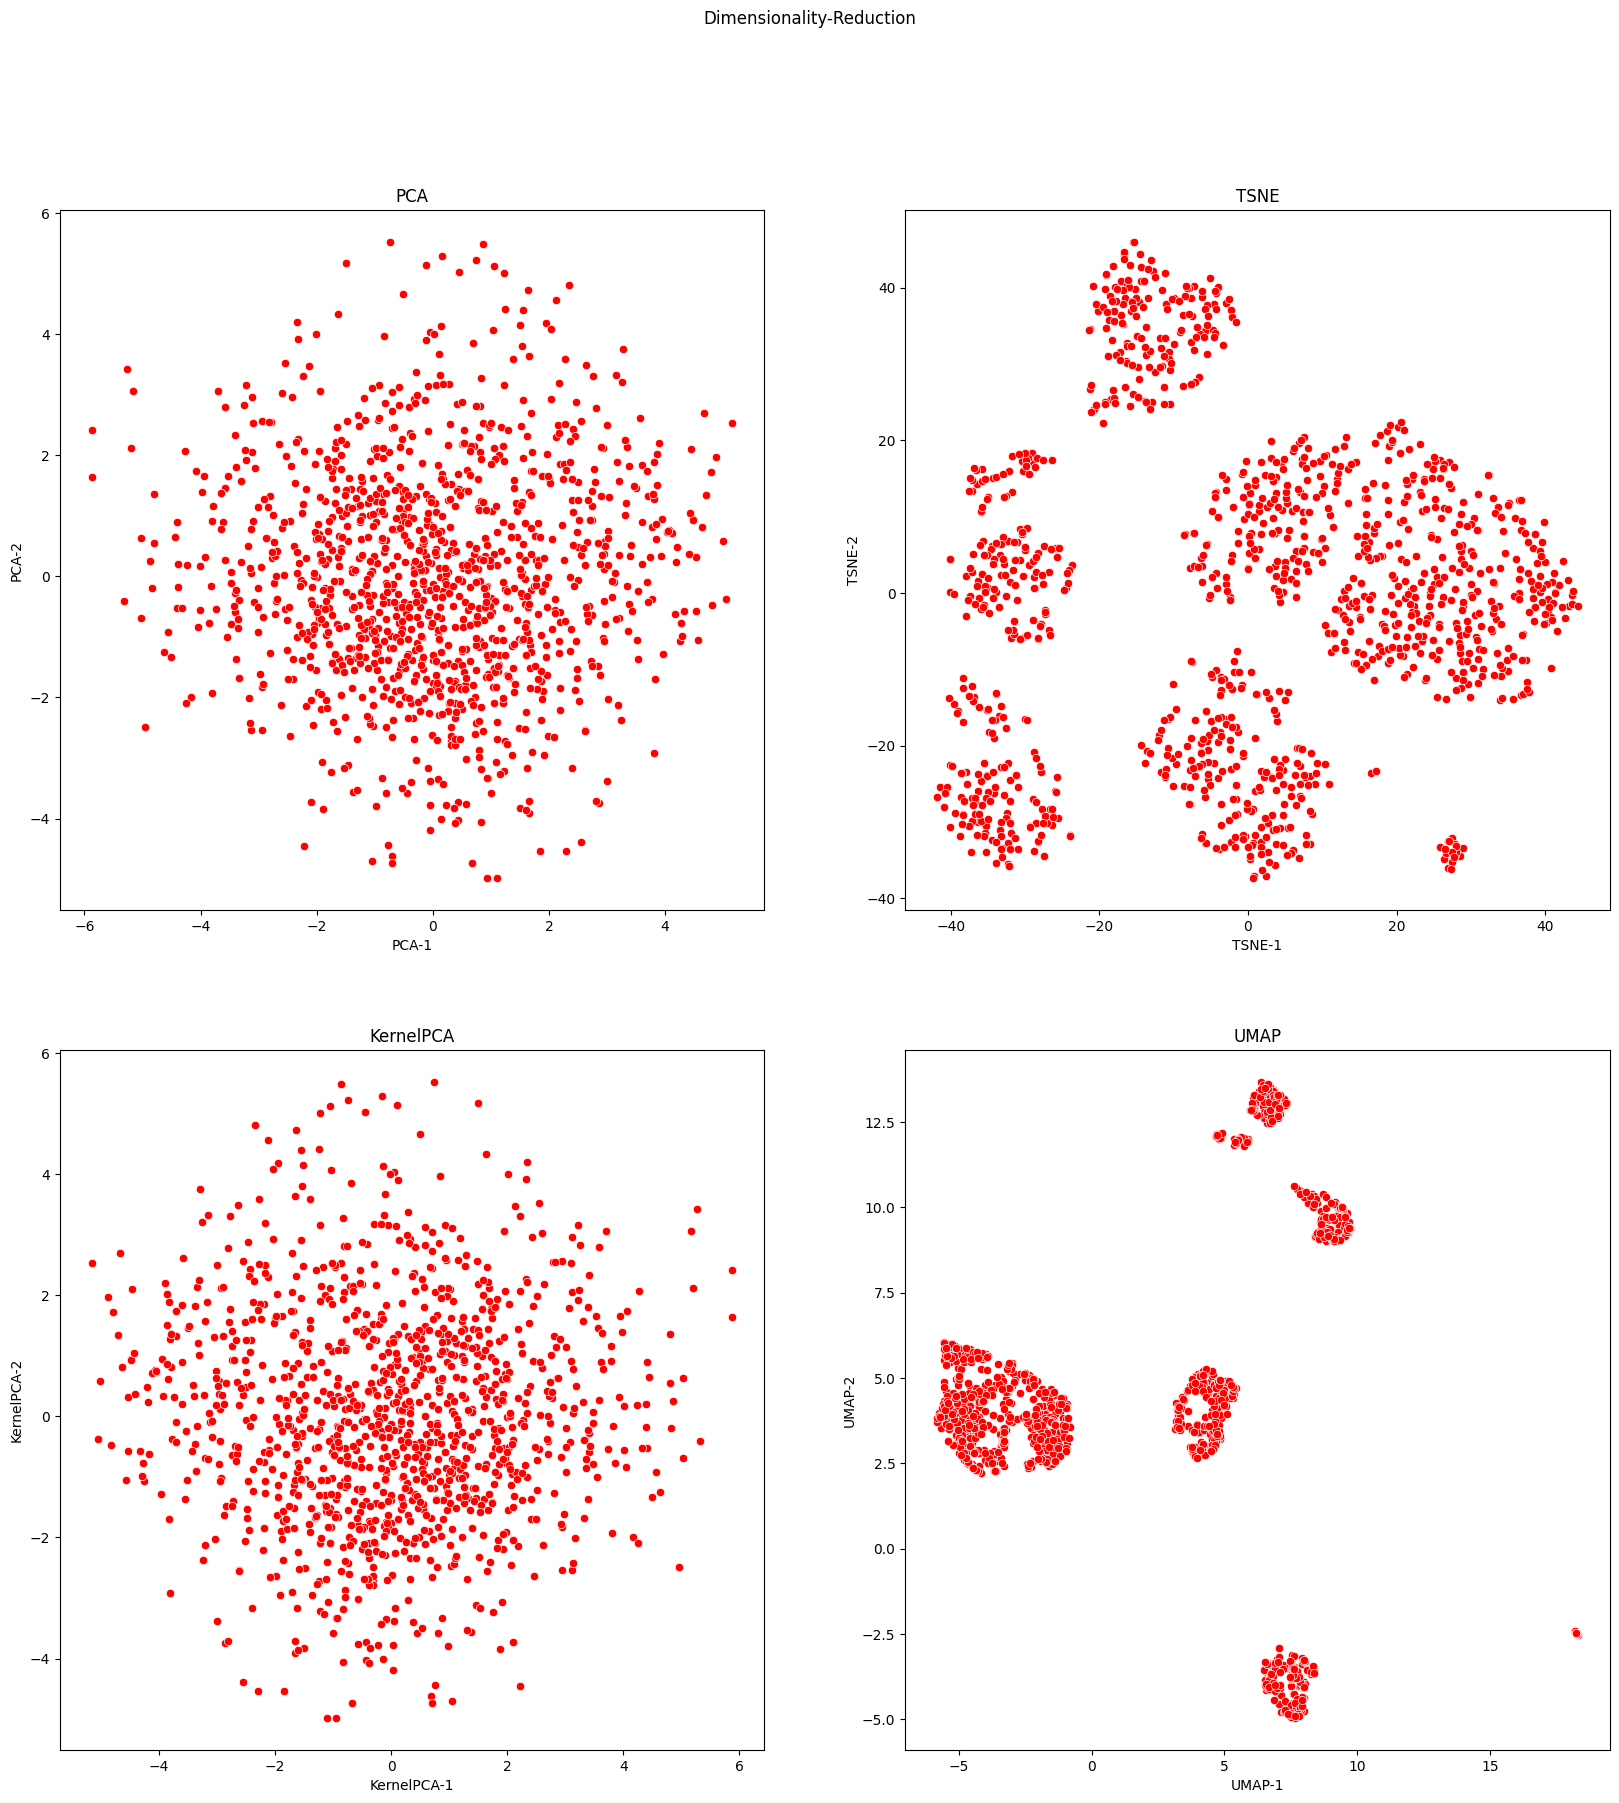

In [11]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
ax=axs.flatten()
for i,(name,model) in enumerate(pipeline.items()):
    df_scaled=model.fit_transform(df)
    sns.scatterplot(x=df_scaled[:,0],y=df_scaled[:,1],color='red',ax=ax[i])
    ax[i].set_xlabel(f"{name}-1")
    ax[i].set_ylabel(f"{name}-2")
    ax[i].set_title(f"{name}")
plt.suptitle("Dimensionality-Reduction")
# plt.savefig("Reduction")

### Selecting UMAP for reduction since it displays best results.

# Kmeans Clustering

### Silhouette Score

In [12]:
np.random.seed(42)
for i in range(2,10):
    pipeline=Pipeline([
        ('preprocess',preprocessor),
        ('scale',StandardScaler()),
        ('reduce',umap.UMAP(n_components=2,n_jobs=-1))
    ])
    df_reduce=pipeline.fit_transform(df)
    kmeans=KMeans(n_clusters=i,n_init=10,init='k-means++')
    labels=kmeans.fit_predict(df_reduce)
    print(f"Silhouette Score for {i} clusters is {silhouette_score(df_reduce,labels)}")
 #Best at 5

Silhouette Score for 2 clusters is 0.6496953368186951
Silhouette Score for 3 clusters is 0.7233210206031799
Silhouette Score for 4 clusters is 0.7508034706115723
Silhouette Score for 5 clusters is 0.7545893788337708
Silhouette Score for 6 clusters is 0.7617356777191162
Silhouette Score for 7 clusters is 0.6657131910324097
Silhouette Score for 8 clusters is 0.6487947702407837
Silhouette Score for 9 clusters is 0.6465665102005005


### Model Results

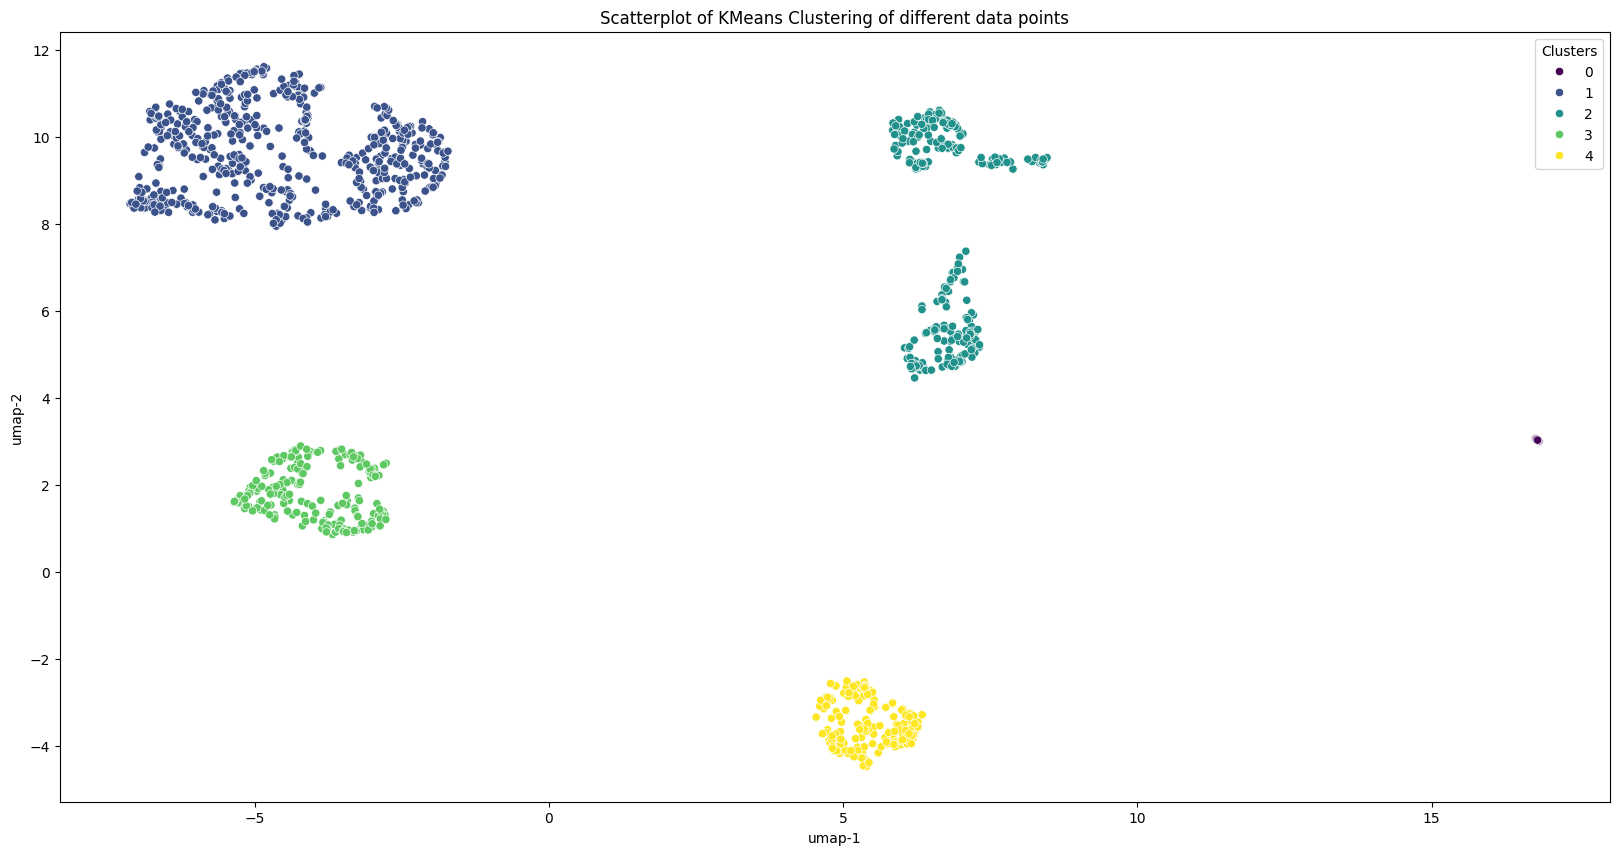

In [13]:
pipeline1=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('reduce',umap.UMAP(n_components=2,n_jobs=-1))

])
joblib.dump(pipeline1,'ml_unsupervise_pipeline')
fig=plt.figure(figsize=(20,10))
kmeans=KMeans(n_clusters=5,n_init=10,init='k-means++',random_state=40)
df_reduce=pd.DataFrame(pipeline1.fit_transform(df),columns=['umap-1','umap-2'])
labels=kmeans.fit_predict(df_reduce)
df_reduce['Clusters']=labels
df_reduce
sns.scatterplot(x=df_reduce.iloc[:,0],y=df_reduce.iloc[:,1],hue=df_reduce['Clusters'],palette='viridis')
plt.title("Scatterplot of KMeans Clustering of different data points")
plt.show()

### Model Evaluation

In [14]:
print(f"Inertia:{kmeans.inertia_} \n\n\n Center of clusters:{kmeans.cluster_centers_}")
df_reduce['Clusters'].value_counts()

Inertia:3580.174072265625 


 Center of clusters:[[16.799665   3.0282347]
 [-4.547436   9.607211 ]
 [ 6.810113   7.6807795]
 [-4.0030804  1.797113 ]
 [ 5.426224  -3.5222921]]


Clusters
1    540
2    275
3    209
4    162
0     18
Name: count, dtype: int64

# Agglomerative Clustering

### Silhouette Score

In [15]:
for i in range(2,10):
    pipeline=Pipeline([
        ('preprocess',preprocessor),
        ('scale',StandardScaler()),
        ('reduce',umap.UMAP(n_components=2,n_jobs=-1))
    ])
    reduced_data=pipeline.fit_transform(df)
    kmeans=AgglomerativeClustering(n_clusters=i)
    labels=kmeans.fit_predict(reduced_data)
    print(f"Silhouette Score for {i} clusters is {silhouette_score(reduced_data,labels)}")
    #Best at 5

Silhouette Score for 2 clusters is 0.6488614082336426
Silhouette Score for 3 clusters is 0.6589714288711548
Silhouette Score for 4 clusters is 0.7207434177398682
Silhouette Score for 5 clusters is 0.7218143939971924
Silhouette Score for 6 clusters is 0.724720299243927
Silhouette Score for 7 clusters is 0.6633668541908264
Silhouette Score for 8 clusters is 0.6504359245300293
Silhouette Score for 9 clusters is 0.6459733843803406



### Model Results

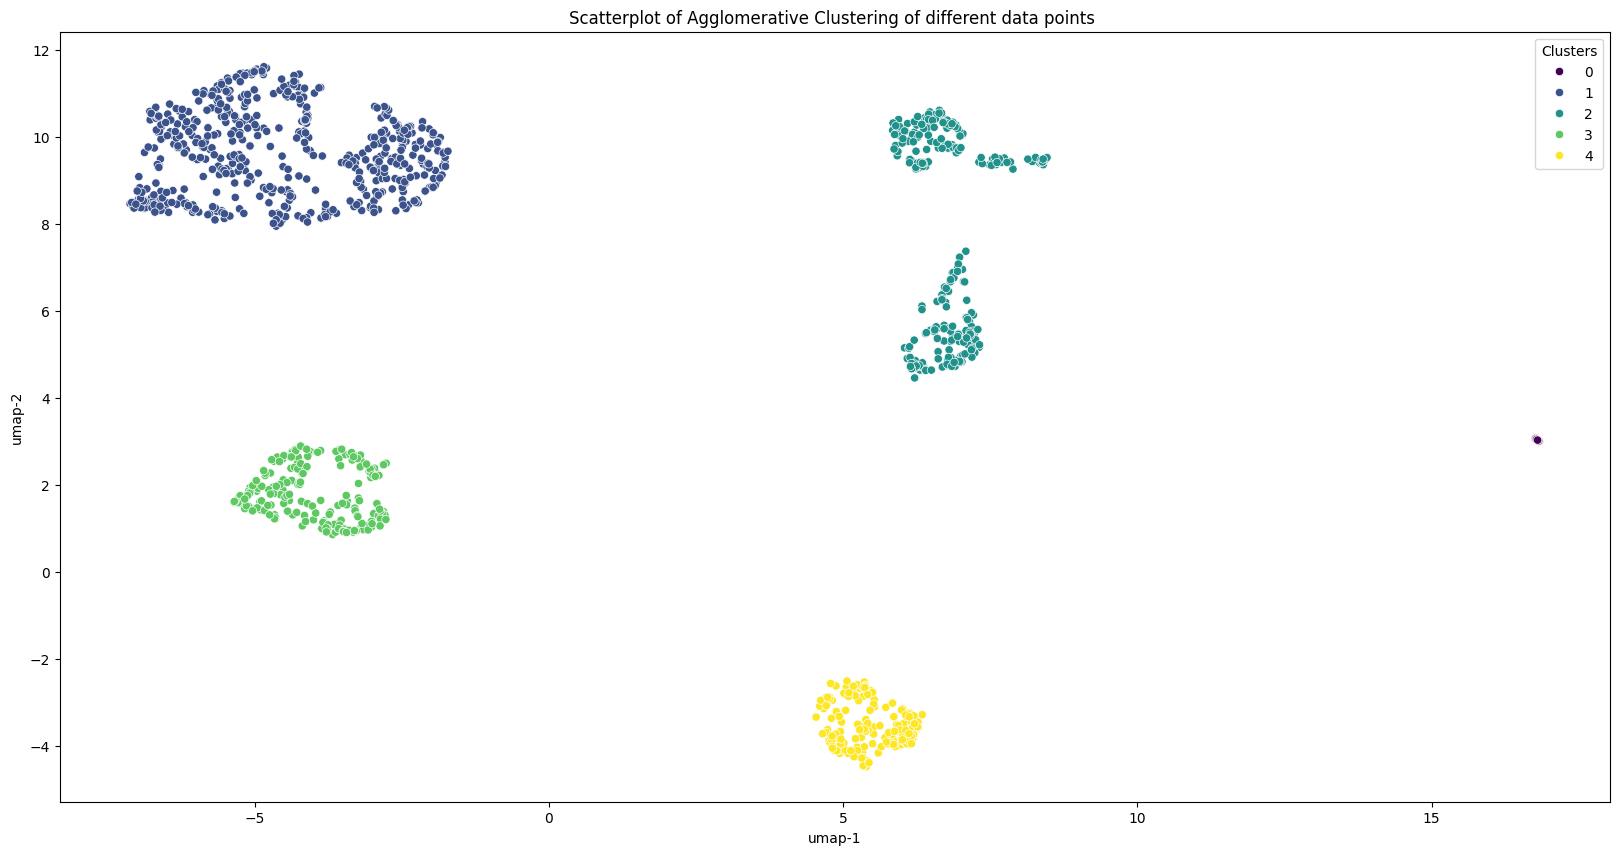

In [16]:
pipeline2=Pipeline([
    ('preprocess',preprocessor),
    ('scale',StandardScaler()),
    ('reduce',umap.UMAP(n_components=2,n_jobs=-1))

])

fig=plt.figure(figsize=(20,10))
agglo=AgglomerativeClustering(n_clusters=5)
df_reduce1=pd.DataFrame(pipeline2.fit_transform(df),columns=['umap-1','umap-2'])
labels=agglo.fit_predict(df_reduce)
df_reduce1['Clusters']=labels
df_reduce1
sns.scatterplot(x=df_reduce.iloc[:,0],y=df_reduce.iloc[:,1],hue=df_reduce['Clusters'],palette='viridis')
plt.title("Scatterplot of Agglomerative Clustering of different data points ")
plt.show()

### Model Evaluation

In [17]:
df_reduce1['Clusters'].value_counts()

Clusters
1    540
0    275
3    209
2    162
4     18
Name: count, dtype: int64

# Description of clusters in Layperson's terms

## Cluster 0
### Cluster 0 – “Quiet Copers” 
Mid-career employees who experience moderate stress levels but tend to keep their struggles to themselves. They rarely reach out for professional or workplace help, partly because the support systems and benefits available to them are inconsistent or unclear. As a result, they often choose to manage their challenges quietly, even when doing so may affect their well-being over time.

In [24]:
df['Clusters']=df_reduce['Clusters']
df[df['Clusters']==0]

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support,Clusters
0,37,No_data,0.0,1,4,No,Yes,1.0,0.5,0.0,...,3,0.0,0.5,1.0,0.0,1.0,No,1.0,4.5,0
1,44,No_data,0.0,0,1,No,No,0.5,0.0,0.5,...,2,0.5,0.0,0.0,0.0,0.5,No,1.0,3.0,0
2,32,No_data,0.0,0,1,No,Yes,0.0,0.0,0.0,...,1,0.0,1.0,1.0,1.0,0.0,No,0.0,1.0,0
3,31,No_data,1.0,1,4,No,Yes,0.0,1.0,0.0,...,1,1.0,0.5,0.0,0.5,0.0,Yes,2.0,2.0,0
4,31,No_data,0.0,0,0,Yes,Yes,1.0,0.0,0.5,...,2,0.0,0.5,1.0,1.0,0.5,No,0.5,3.5,0
5,33,No_data,1.0,0,3,No,Yes,1.0,0.5,0.0,...,2,0.0,1.0,1.0,0.0,0.5,No,1.5,3.5,0
6,35,No_data,1.0,1,3,Yes,Yes,0.0,0.0,0.0,...,1,0.5,0.5,0.0,0.0,0.5,No,2.0,1.0,0
7,39,No_data,0.0,0,0,Yes,Yes,0.0,1.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,No,0.0,3.0,0
8,42,No_data,1.0,1,3,No,Yes,1.0,1.0,0.0,...,0,0.5,1.0,1.0,0.0,0.0,No,1.5,2.0,0
9,23,No_data,0.0,0,0,No,Yes,0.5,0.0,0.5,...,2,0.0,1.0,1.0,0.5,1.0,No,1.0,3.0,0


## Clusters 1
### Cluster 1-"The Under-supported Professionals"
Members of this cluster are often employed by tech companies and have access to various benefits, yet they report that their companies have limited wellness programs and care options. They have a low risk score but are not actively in treatment, suggesting they may be struggling with mental health issues but feel unsupported in seeking help through their workplace.

In [28]:
df[df['Clusters']==1]

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support,Clusters
20,29,No,1.0,1,3,No,Yes,1.0,1.0,0.0,...,1,0.5,0.5,0.5,0.0,0.0,No,1.5,3.0,1
24,33,No,1.0,1,1,No,Yes,1.0,0.5,0.5,...,2,0.0,1.0,1.0,0.0,0.5,No,1.5,4.0,1
26,33,No,0.0,0,2,No,Yes,0.5,0.5,0.0,...,2,0.5,0.5,0.0,0.0,0.5,No,1.0,3.0,1
29,37,No,0.0,0,3,No,Yes,0.0,0.0,0.0,...,0,1.0,0.5,0.0,0.0,0.0,No,1.0,0.0,1
34,40,No,0.0,1,3,No,Yes,1.0,1.0,0.0,...,2,0.5,0.5,0.0,0.0,1.0,No,1.5,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,32,No,0.0,0,0,No,Yes,1.0,0.5,0.5,...,3,0.0,0.0,0.5,0.5,0.5,No,0.5,5.0,1
1193,41,No,1.0,1,3,No,Yes,1.0,0.0,0.0,...,2,1.0,0.0,0.0,0.0,0.5,No,2.5,3.0,1
1194,30,No,1.0,1,3,No,Yes,1.0,1.0,0.5,...,4,0.0,1.0,1.0,0.5,1.0,No,2.0,6.5,1
1199,26,No,0.0,1,2,No,Yes,0.0,0.0,0.0,...,3,0.0,0.5,0.5,0.0,0.5,No,0.5,3.0,1


# Cluster 2

### Cluster 2-"Vulnerable Individuals with Limited Support"
This cluster represents a group of individuals who are more likely to have a family history of mental illness and are more likely to have a mental health consequence as a result of their work. They have limited access to wellness programs, seek help from their employers, but report their mental health is not being treated. They are also less likely to work remotely and feel their employers do not provide care options for them.

In [30]:
df[df['Clusters']==2]

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support,Clusters
18,46,Yes,1.0,0,3,Yes,Yes,1.0,0.5,1.0,...,4,0.0,1.0,1.0,0.0,1.0,Yes,2.0,6.5,2
19,36,Yes,1.0,0,2,Yes,Yes,0.0,0.0,1.0,...,3,0.0,0.5,0.5,0.5,0.5,No,1.5,4.0,2
21,31,Yes,0.0,0,0,Yes,Yes,0.0,0.0,0.0,...,1,0.0,0.5,0.5,0.0,1.0,No,1.0,1.0,2
31,31,Yes,1.0,0,1,Yes,Yes,0.0,1.0,0.0,...,1,1.0,0.0,0.0,0.0,0.0,Yes,2.0,2.0,2
40,24,No,0.0,1,3,No,Yes,0.0,0.0,0.0,...,2,0.5,0.5,0.0,0.0,0.0,Yes,0.5,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,28,No,1.0,1,4,No,No,1.0,1.0,1.0,...,3,1.0,0.5,1.0,0.0,0.0,Yes,2.0,6.0,2
1186,31,Yes,0.0,1,4,Yes,Yes,0.0,0.0,0.0,...,3,0.5,0.5,0.0,0.0,0.5,No,1.0,3.0,2
1190,22,No,1.0,1,4,No,No,1.0,1.0,1.0,...,2,0.5,0.0,1.0,0.0,0.5,Yes,2.0,5.0,2
1192,36,No,0.0,1,4,No,Yes,0.0,0.0,0.0,...,0,1.0,0.5,0.0,0.0,0.5,Yes,1.5,0.0,2


# Cluster 3

### Cluster 3-"The Open Advocates"
This cluster is characterized by individuals who are more likely to have a family history of mental illness 
and have experienced mental health consequences at work. However, they have a high support score and are open about their struggles. 
They have access to numerous benefits, and their employers' actions and values align with their own views on mental health, which is 
a key factor in their overall feeling of support.

In [ ]:
df[df['Clusters']==3]

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support,Clusters
18,46,Yes,1.0,0,3,Yes,Yes,1.0,0.5,1.0,...,4,0.0,1.0,1.0,0.0,1.0,Yes,2.0,6.5,2
19,36,Yes,1.0,0,2,Yes,Yes,0.0,0.0,1.0,...,3,0.0,0.5,0.5,0.5,0.5,No,1.5,4.0,2
21,31,Yes,0.0,0,0,Yes,Yes,0.0,0.0,0.0,...,1,0.0,0.5,0.5,0.0,1.0,No,1.0,1.0,2
31,31,Yes,1.0,0,1,Yes,Yes,0.0,1.0,0.0,...,1,1.0,0.0,0.0,0.0,0.0,Yes,2.0,2.0,2
40,24,No,0.0,1,3,No,Yes,0.0,0.0,0.0,...,2,0.5,0.5,0.0,0.0,0.0,Yes,0.5,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,28,No,1.0,1,4,No,No,1.0,1.0,1.0,...,3,1.0,0.5,1.0,0.0,0.0,Yes,2.0,6.0,2
1186,31,Yes,0.0,1,4,Yes,Yes,0.0,0.0,0.0,...,3,0.5,0.5,0.0,0.0,0.5,No,1.0,3.0,2
1190,22,No,1.0,1,4,No,No,1.0,1.0,1.0,...,2,0.5,0.0,1.0,0.0,0.5,Yes,2.0,5.0,2
1192,36,No,0.0,1,4,No,Yes,0.0,0.0,0.0,...,0,1.0,0.5,0.0,0.0,0.5,Yes,1.5,0.0,2


# Cluster 4

### Cluster 4: Under-Supported Employees
This cluster is comprised of employees who are not self-employed and have a high likelihood of family history with mental health conditions. They are not being treated for mental health conditions but often experience work interference and mental health consequences because they work for companies that do not offer wellness programs or care options.

In [31]:
df[df['Clusters']==4]

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence,risk_score,Support,Clusters
23,41,No,0.0,1,0,No,No,0.5,0.0,0.0,...,2,0.5,0.0,0.0,0.0,0.5,No,1.0,2.5,4
25,35,No,1.0,1,3,No,No,1.0,1.0,0.0,...,4,1.0,0.5,1.0,0.0,0.0,No,2.0,6.0,4
56,26,No,0.0,0,2,No,No,0.0,0.0,0.0,...,3,0.0,0.5,1.0,0.5,0.5,No,0.5,3.0,4
66,31,No,0.0,0,2,Yes,No,0.5,0.0,0.5,...,2,0.5,0.5,0.0,0.0,0.5,No,1.0,3.0,4
79,30,No,0.0,0,0,No,No,0.0,0.0,0.0,...,2,0.0,0.5,1.0,0.0,0.0,No,0.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,25,No,1.0,1,3,No,No,1.0,1.0,1.0,...,4,0.0,1.0,1.0,1.0,1.0,No,2.0,7.0,4
1189,32,No,0.0,0,2,No,No,0.0,0.0,0.0,...,2,0.5,0.5,1.0,0.0,0.0,No,0.5,2.0,4
1196,36,No,1.0,1,4,No,No,0.0,1.0,0.0,...,3,0.0,0.5,1.0,0.0,1.0,No,2.0,4.0,4
1198,36,No,1.0,0,1,No,No,0.5,0.0,1.0,...,3,0.5,0.5,0.5,0.0,0.5,No,2.0,4.5,4
